<a href="https://colab.research.google.com/github/prnvvv/Machine-Learning/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score

In [147]:
df = pd.read_csv("./Breast_Cancer.csv")

In [148]:
features = df.columns.drop(["Status"])

In [149]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [138]:
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
5,51,2,3,0,0,0,0,2,1,20,1,1,18,2,89,0
6,51,2,1,0,0,0,3,1,1,8,1,1,11,1,54,0
7,40,2,1,1,0,1,0,2,1,30,1,1,9,1,14,1
8,40,2,0,3,2,4,1,3,1,103,1,1,20,18,70,0
9,69,2,1,3,2,4,3,1,0,32,1,1,21,12,92,0


In [139]:
df.dtypes

Age                       int64
Race                      int64
Marital Status            int64
T Stage                   int64
N Stage                   int64
6th Stage                 int64
differentiate             int64
Grade                     int64
A Stage                   int64
Tumor Size                int64
Estrogen Status           int64
Progesterone Status       int64
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int64
dtype: object

In [140]:
labelencoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = labelencoder.fit_transform(df[i])

<Axes: >

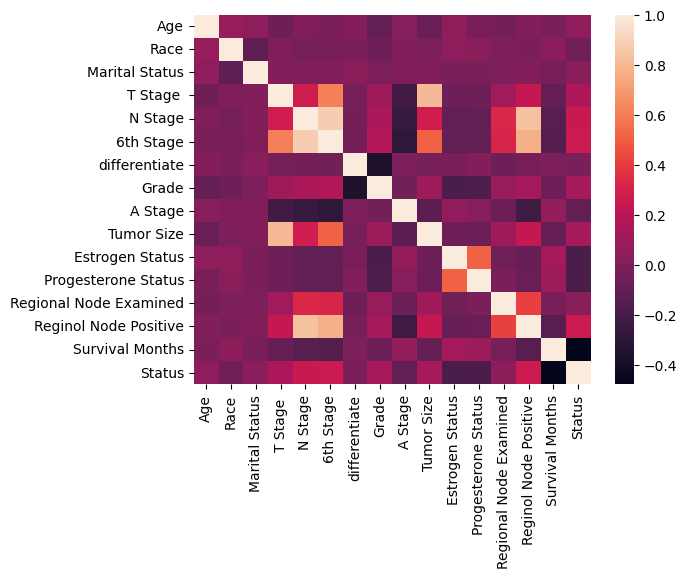

In [141]:
sns.heatmap(df.corr())

In [142]:
X = df[features]
y = df["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [143]:
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [144]:
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"R2 Score: {r2_score(y_test, prediction)}")

Accuracy Score: 0.9142857142857143
R2 Score: 0.2503441574216536


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [128]:
X_train.shape

(3219, 14)

In [132]:
model = Sequential()
model.add(Dense(128, input_dim = 14, activation = "sigmoid"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [133]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [134]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
101/101 [==============================] - 2s 4ms/step - loss: 0.4362 - accuracy: 0.8406
Epoch 2/100
101/101 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8419
Epoch 3/100
101/101 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8453
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8431
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8428
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8441
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8462
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8462
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8447
Epoch 10/100
101/101 [==============================] - 0s 3ms/step - loss: 0.3800 - accura